In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from models import try_model

In [2]:
X_train = pd.read_csv('X_train_5000.csv')
X_test = pd.read_csv('X_test_5000.csv')
y_train = pd.read_csv('y_train_5000.csv')
y_test = pd.read_csv('y_test_5000.csv')

### Datos según variable predictora:

In [3]:
data_cuerpo = [X_train.Cuerpo, y_train.Periódico, X_test.Cuerpo, y_test.Periódico]

data_titular = [X_train.Titular, y_train.Periódico, X_test.Titular, y_test.Periódico]

data_mix = [X_train.Titular + ". " + X_train.Cuerpo, y_train.Periódico, X_test.Titular + ". " + X_test.Cuerpo, y_test.Periódico]

data_longitudes = [pd.DataFrame(X_train.Cuerpo.str.len()), y_train.Periódico, pd.DataFrame(X_test.Cuerpo.str.len()), y_test.Periódico]
# paso la X a dataframe porque es el formato que se le suele dar trabajando en pandas cuando X son variables numéricas
# en el caso de ser texto no, porque queremos pasarle al objeto vectorizador una matriz de numpy (o serie de pandas) con los documentos de texto

datos = {'CUERPO': data_cuerpo, 'TITULAR': data_titular, 'TITULAR + CUERPO': data_mix, 'LONGITUD': data_longitudes}

### Modelos que vamos a usar:

In [4]:
logit = LogisticRegression( C = 0.2, max_iter = 20000)

tree = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 10) 

adaboost = AdaBoostClassifier(estimator = RandomForestClassifier(max_depth = 5), n_estimators = 50, learning_rate = 0.1) 

modelos = {'Regresión logística': logit, 'Árbol de decisión': tree, 'Ada-Boost': adaboost}

In [5]:
for parte_noticia in datos:
    print(f'\n\nUtilizando {parte_noticia}:')
    
    for modelo in modelos:
        print(f'\nCon {modelo}')
        if parte_noticia == 'LONGITUD':
            try_model(modelos[modelo], datos[parte_noticia])
        else:
            try_model(modelos[modelo], datos[parte_noticia], text = True)



Utilizando CUERPO:

Con Regresión logística
accuracy en train: 0.8146341463414634, accuracy en test: 0.7436412315930389

Con Árbol de decisión
accuracy en train: 0.6091822094691535, accuracy en test: 0.5749665327978581

Con Ada-Boost
accuracy en train: 0.7586800573888092, accuracy en test: 0.7061579651941098


Utilizando TITULAR:

Con Regresión logística
accuracy en train: 0.5847919655667145, accuracy en test: 0.4444444444444444

Con Árbol de decisión
accuracy en train: 0.3437589670014347, accuracy en test: 0.3313253012048193

Con Ada-Boost
accuracy en train: 0.44017216642754664, accuracy en test: 0.3862115127175368


Utilizando TITULAR + CUERPO:

Con Regresión logística
accuracy en train: 0.8097560975609757, accuracy en test: 0.7356091030789826

Con Árbol de decisión
accuracy en train: 0.6140602582496413, accuracy en test: 0.5736278447121821

Con Ada-Boost
accuracy en train: 0.7558106169296988, accuracy en test: 0.6994645247657296


Utilizando LONGITUD:

Con Regresión logística
accu

In [6]:
# EL ADA-BOOST tarda bastante... si quieres hacer una prueba rapida, quitalo o cambialo por otro

# Conclusión:
### A simple vista, parece que una REGRESIÓN LOGÍSTICA sobre el CUERPO de la noticia nos da una gran combinación de precisión, simplicidad y rapidez

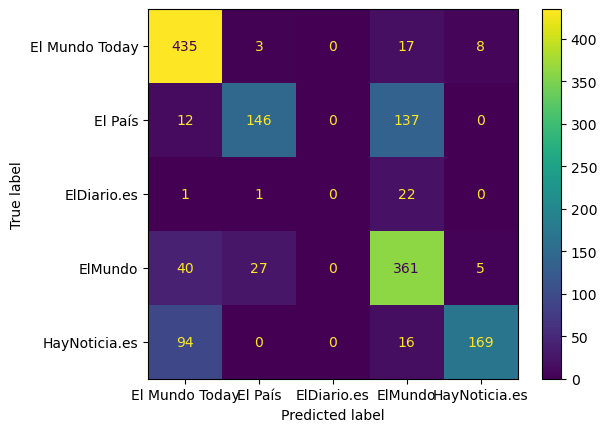

accuracy en train: 0.8146341463414634, accuracy en test: 0.7436412315930389


In [8]:

try_model(logit, data_cuerpo, text = True, cm = True)

In [ ]:
# NOTAs: 

# Salvo utilizando la variable longitud, los modelos tienen cierto sobreajuste aun habiendo ajustado hiperparámetros manualmente. Sería bueno corregirlo si diera tiempo (quizá añadiendo más datos y haciendo una mejor limpieza)
# Se podría probar un stacking (seguramente con r. logistica) de las r. logisticas de "CUERPO" y "LONGITUD", aunque no creo que mejore